# Create NLP pipeline to "clean" Reviews data:
> input data
>> tokenize
>>> stopwords
>>>> stemming
>>>>> output data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\HP\Desktop\projects\imdb_movie_review_dataset\IMDB Dataset.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
import nltk

In [5]:
from nltk.tokenize import regexp_tokenize,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [6]:
tokenizer= RegexpTokenizer('[a-z]+')
ps=PorterStemmer()
s_words=set(stopwords.words("english"))


In [7]:
s_words={ps.stem(s) for s in s_words}

In [8]:

def Clean_review(text):
    text=text.lower()
    #tokenizer
    text= tokenizer.tokenize(text)
    text=[ps.stem(x) for x in text]
    text=[x for x in text if x not in s_words or x=="not"]
    #text=[ps.stem(x) for x in text]
    return(" ".join(text))

## prepairing data

In [10]:
x_train=df.iloc[:1000,0]
x_test=df.iloc[1000:2000,0]
y_train=df.iloc[:1000,1]
y_test=df.iloc[1000:2000,1]

In [11]:
#We'll work here with 1000 reviews only
for i in range(1000):
    x_train.iloc[i]=Clean_review(x_train.iloc[i])
    x_test.iloc[i]=Clean_review(x_test.iloc[i])

# Vectorizing x_train,x_test

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
vectorizer=CountVectorizer()# to convert x_train and y_train into vector form that can be evaluated using bayes model

In [14]:
x_train_vect=vectorizer.fit_transform(x_train)

In [15]:
x_train_vect.shape

(1000, 12301)

In [16]:
#x_test_vect=vectorizer.fit_transform(x_test)

In [17]:
#x_test_vect.shape# we see no. of columns of x_test_vect is not same as x_train_vect hence it will be a problem

In [18]:
x_test_vect=vectorizer.transform(x_test)#hence we need to use transform instead of fit tranform for x_test
x_test_vect.shape #now shape in same 

(1000, 12301)

In [19]:
x_train_vect.toarray(),x_train_vect.shape# 1000 samples and 12301 features i.e. size of vocab is

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 (1000, 12301))

In [20]:
#vectorizer.vocabulary_

In [21]:
# gives all the feature names that are key values in vocabulary above
#vectorizer.get_feature_names()

In [22]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB #both used for descrete features

In [23]:
mnb=MultinomialNB()

In [24]:
mnb.fit(x_train_vect,y_train)

MultinomialNB()

In [25]:
mnb.classes_

array(['negative', 'positive'], dtype='<U8')

In [26]:
y_predict=mnb.predict(x_test_vect)

In [30]:
y_predict[:5]

array(['negative', 'positive', 'negative', 'positive', 'positive'],
      dtype='<U8')

In [31]:
mnb.predict_proba(x_test_vect)#probability foreach sample to be classified as negative and positive,the class is
#chosen on basis of greater probability

array([[1.00000000e+00, 3.60731559e-12],
       [2.46026674e-02, 9.75397333e-01],
       [9.98403238e-01, 1.59676217e-03],
       ...,
       [9.99999712e-01, 2.87649758e-07],
       [4.77070774e-04, 9.99522929e-01],
       [9.99984477e-01, 1.55225163e-05]])

## Accuracy

In [32]:
acc=np.sum(y_predict==y_test)/y_test.shape[0]

In [33]:
acc

0.804

## Confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[421,  75],
       [121, 383]], dtype=int64)

In [36]:
import seaborn as sns

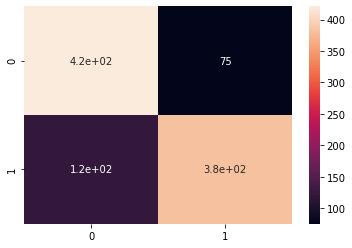

In [37]:
sns.heatmap(cm,annot=True)# we see greater diagonal values give better model